# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.11/x64/bin/python -m pip install --upgrade pip' command.


#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


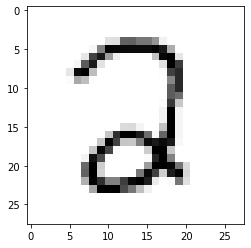

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.20410462634943374
train accuracy is: 0.814805541645802, test accuracy is 0.8371975806451613


Epoch 10 Loss 0.05805483207661552
train accuracy is: 0.9408279085294609, test accuracy is 0.952116935483871


Epoch 20 Loss 0.04156939279357477
train accuracy is: 0.9548489400767819, test accuracy is 0.9632056451612904


Epoch 30 Loss 0.03501823253083362
train accuracy is: 0.9605241195126022, test accuracy is 0.9652217741935484


Epoch 40 Loss 0.031257585062908294
train accuracy is: 0.9647805040894676, test accuracy is 0.96875


Epoch 50 Loss 0.028678229409237907
train accuracy is: 0.9679519278918377, test accuracy is 0.9707661290322581


Epoch 60 Loss 0.026729704582924448
train accuracy is: 0.9701218494408279, test accuracy is 0.9702620967741935


Epoch 70 Loss 0.025188007224835166
train accuracy is: 0.971791019863128, test accuracy is 0.9712701612903226


Epoch 80 Loss 0.023915960083534152
train accuracy is: 0.9731263562009681, test accuracy is 0.9702620967741935


Epoch 90 Loss 0.022826628379081424
train accuracy is: 0.9740443999332332, test accuracy is 0.9717741935483871


Epoch 100 Loss 0.021870361280417507
train accuracy is: 0.9751293607077283, test accuracy is 0.9717741935483871


Epoch 110 Loss 0.02100679131305344
train accuracy is: 0.9761308629611083, test accuracy is 0.9722782258064516


Epoch 120 Loss 0.020238893465015607
train accuracy is: 0.9767985311300283, test accuracy is 0.9727822580645161


Epoch 130 Loss 0.019528597526370994
train accuracy is: 0.9777165748622935, test accuracy is 0.9737903225806451


Epoch 140 Loss 0.018874321474623014
train accuracy is: 0.9786346185945585, test accuracy is 0.9747983870967742


Epoch 150 Loss 0.01826201252922598
train accuracy is: 0.9795526623268236, test accuracy is 0.9747983870967742


Epoch 160 Loss 0.0176882325732156
train accuracy is: 0.9798864964112836, test accuracy is 0.9758064516129032


Epoch 170 Loss 0.017153469993540046
train accuracy is: 0.9813887497913537, test accuracy is 0.9758064516129032


Epoch 180 Loss 0.016651540589655577
train accuracy is: 0.9818060423969287, test accuracy is 0.9763104838709677


Epoch 190 Loss 0.016177532472523216
train accuracy is: 0.9828910031714237, test accuracy is 0.9768145161290323


Epoch 200 Loss 0.015721596154410423
train accuracy is: 0.9831413787347688, test accuracy is 0.9773185483870968


Epoch 210 Loss 0.01529904981424992
train accuracy is: 0.9842263395092639, test accuracy is 0.9783266129032258


Epoch 220 Loss 0.014882802456868505
train accuracy is: 0.9849774661992989, test accuracy is 0.9788306451612904


Epoch 230 Loss 0.014497699243448407
train accuracy is: 0.9853947588048739, test accuracy is 0.9798387096774194


Epoch 240 Loss 0.014121829707921075
train accuracy is: 0.985645134368219, test accuracy is 0.9803427419354839


0.04130927328513475

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.21557740054602087
train accuracy is: 0.7701552328492739, test accuracy is 0.7772177419354839


Epoch 10 Loss 0.09985831185683199
train accuracy is: 0.913036220998164, test accuracy is 0.9309475806451613


Epoch 20 Loss 0.0778444388319554
train accuracy is: 0.92997830078451, test accuracy is 0.9435483870967742


Epoch 30 Loss 0.06750004029629977
train accuracy is: 0.9380737773326656, test accuracy is 0.9480846774193549


Epoch 40 Loss 0.06120374678446995
train accuracy is: 0.9418294107828409, test accuracy is 0.953125


Epoch 50 Loss 0.05687165731846525
train accuracy is: 0.9459188783174762, test accuracy is 0.9566532258064516


Epoch 60 Loss 0.053665269449636954
train accuracy is: 0.9476715072608913, test accuracy is 0.9596774193548387


Epoch 70 Loss 0.05117228250700006
train accuracy is: 0.9493406776831914, test accuracy is 0.9606854838709677


Epoch 80 Loss 0.049163776103530815
train accuracy is: 0.9513436821899516, test accuracy is 0.9621975806451613


Epoch 90 Loss 0.047503345286396444
train accuracy is: 0.9525955600066767, test accuracy is 0.9627016129032258


Epoch 100 Loss 0.046099906109399805
train accuracy is: 0.9532632281755967, test accuracy is 0.9627016129032258


Epoch 110 Loss 0.044894209025419414
train accuracy is: 0.9547654815556669, test accuracy is 0.9642137096774194


Epoch 120 Loss 0.043843309320488515
train accuracy is: 0.9553496912034719, test accuracy is 0.9637096774193549


Epoch 130 Loss 0.04291638692269919
train accuracy is: 0.956100817893507, test accuracy is 0.9632056451612904


Epoch 140 Loss 0.04209063356791397
train accuracy is: 0.9562677349357369, test accuracy is 0.9652217741935484


Epoch 150 Loss 0.041348906347431935
train accuracy is: 0.956685027541312, test accuracy is 0.9657258064516129


Epoch 160 Loss 0.04067782237278163
train accuracy is: 0.956851944583542, test accuracy is 0.9652217741935484


Epoch 170 Loss 0.040066780704067766
train accuracy is: 0.957185778668002, test accuracy is 0.9662298387096774


Epoch 180 Loss 0.03950700731444625
train accuracy is: 0.957436154231347, test accuracy is 0.9662298387096774


Epoch 190 Loss 0.0389913792019226
train accuracy is: 0.9579369053580371, test accuracy is 0.9662298387096774


Epoch 200 Loss 0.03851530362371736
train accuracy is: 0.9587714905691871, test accuracy is 0.9667338709677419


Epoch 210 Loss 0.038072626543479135
train accuracy is: 0.9592722416958771, test accuracy is 0.9667338709677419


Epoch 220 Loss 0.037660006608135566
train accuracy is: 0.9598564513436821, test accuracy is 0.9662298387096774


Epoch 230 Loss 0.03727455715374872
train accuracy is: 0.9601902854281422, test accuracy is 0.9657258064516129


Epoch 240 Loss 0.036913692994255246
train accuracy is: 0.9604406609914873, test accuracy is 0.9657258064516129


0.02802143022478443

### Comparing results of NN and LR

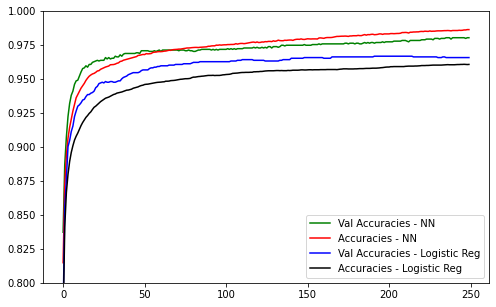

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

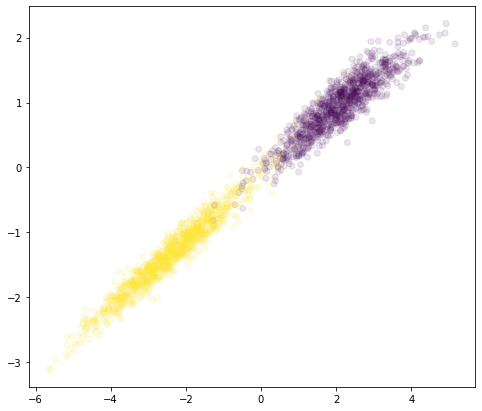

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

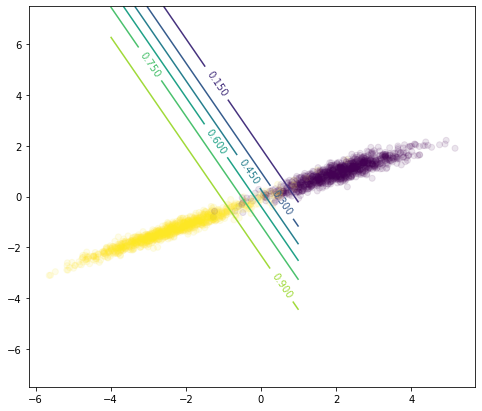

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );